In [1]:
import pandas as pd
import requests
from io import StringIO

In [2]:
github="https://raw.githubusercontent.com/agronomy4future/raw_data_practice/main/wheat_grain_Fe_uptake.csv"
response=requests.get(github)
dataA=pd.read_csv(StringIO(response.text))
dataA

,Location,Season,Genotype,Reps,Iron_ton_ha,Stage,Fe
0,East,2021,CV9,1,7.5833,Vegetative,0.36
1,East,2021,CV9,2,4.1246,Vegetative,0.32
2,East,2021,CV9,3,3.0873,Vegetative,0.39
3,East,2021,CV9,4,7.4287,Vegetative,0.37
4,East,2021,CV9,5,11.4825,Vegetative,0.36
...,...,...,...,...,...,...,...
2809,North,2022,CV1,16,20.8424,Maturity,0.03
2810,North,2022,CV1,17,5.2393,Maturity,0.06
2811,North,2022,CV1,18,10.4318,Maturity,0.05
2812,North,2022,CV1,19,4.0453,Maturity,0.05


In [3]:
grouped_data_location_season = dataA.groupby(['Location', 'Season']).agg(
    Iron_ton_ha_Mean=('Iron_ton_ha', 'mean'),
    Iron_ton_ha_SE=('Iron_ton_ha', 'sem'),  # Standard Error of the Mean
    Fe_Mean=('Fe', 'mean'),
    Fe_SE=('Fe', 'sem')  # Standard Error of the Mean
).reset_index()

grouped_data_location_season

,Location,Season,Iron_ton_ha_Mean,Iron_ton_ha_SE,Fe_Mean,Fe_SE
0,East,2021,9.056762,0.226582,0.276900,0.004071
1,East,2022,9.035656,0.227262,0.189753,0.003961
2,North,2021,11.027996,0.261214,0.291822,0.005289
3,North,2022,12.447878,0.379243,0.191580,0.003738


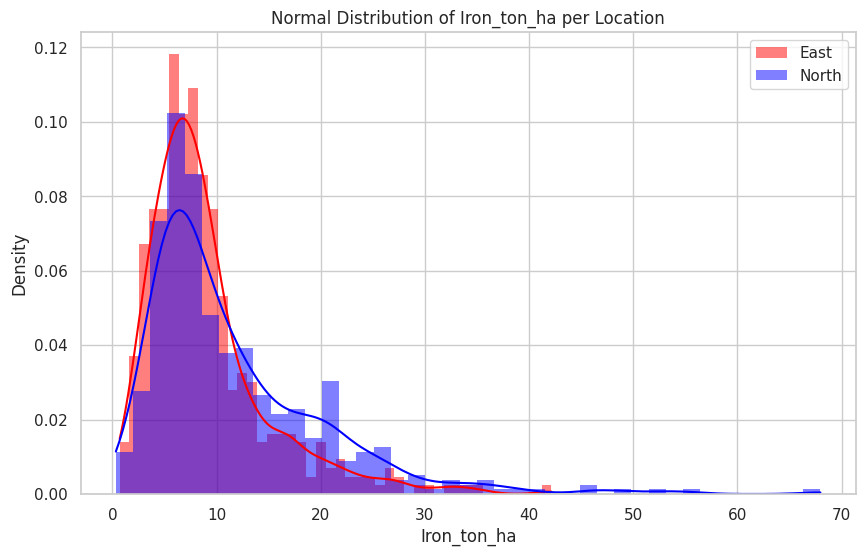

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Filter data for each location
east_data = dataA[dataA['Location'] == 'East']['Iron_ton_ha']
north_data = dataA[dataA['Location'] == 'North']['Iron_ton_ha']

# Plot the distributions
plt.figure(figsize=(10, 6))
sns.histplot(east_data, color="red", kde=True, stat="density", linewidth=0, label="East", alpha=0.5)
sns.histplot(north_data, color="blue", kde=True, stat="density", linewidth=0, label="North", alpha=0.5)

plt.title('Normal Distribution of Iron_ton_ha per Location')
plt.xlabel('Iron_ton_ha')
plt.ylabel('Density')
plt.legend()

plt.show()


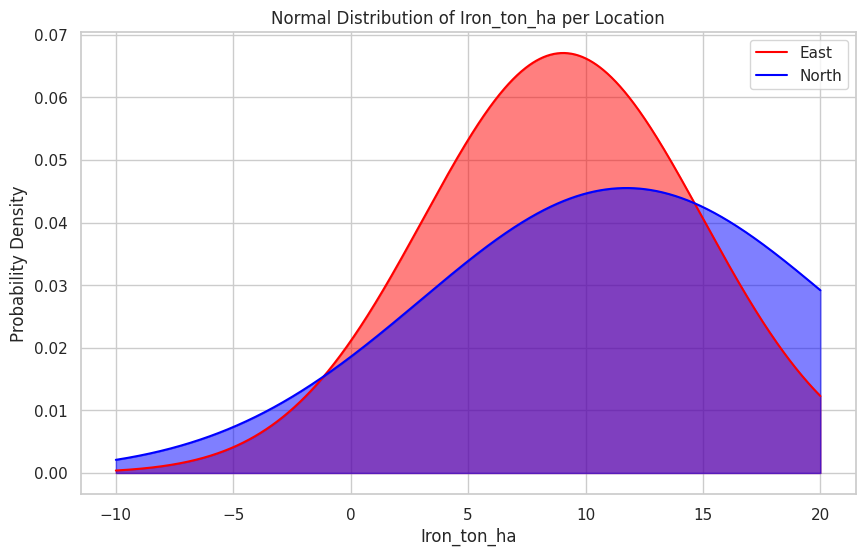

In [7]:
from scipy.stats import norm

# Calculate the mean and standard deviation for each location's Iron_ton_ha
mean_east = east_data.mean()
std_east = east_data.std()
mean_north = north_data.mean()
std_north = north_data.std()

# Generate points on the x axis between -10 and 20:
points = np.linspace(-10, 20, 1000)

# Calculate the PDFs using the mean and std for each location
pdf_east = norm.pdf(points, mean_east, std_east)
pdf_north = norm.pdf(points, mean_north, std_north)

# Plot the PDFs
plt.figure(figsize=(10, 6))
plt.plot(points, pdf_east, color="red", label="East")
plt.plot(points, pdf_north, color="blue", label="North")
plt.fill_between(points, pdf_east, color="red", alpha=0.5)
plt.fill_between(points, pdf_north, color="blue", alpha=0.5)

plt.title('Normal Distribution of Iron_ton_ha per Location')
plt.xlabel('Iron_ton_ha')
plt.ylabel('Probability Density')
plt.legend()

plt.show()


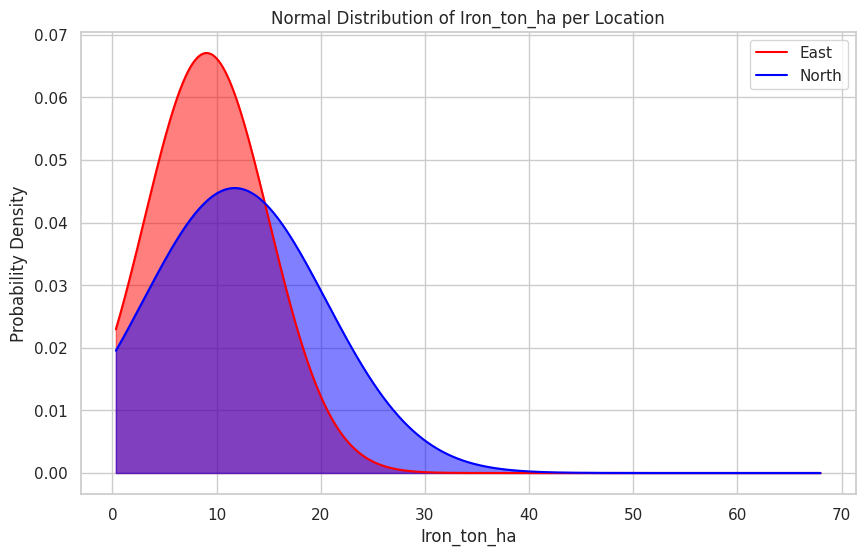

In [8]:
# Determine a more appropriate range for the data based on the actual distributions
min_val = min(east_data.min(), north_data.min())
max_val = max(east_data.max(), north_data.max())

# Generate points on the x axis based on the data range
points_adjusted = np.linspace(min_val, max_val, 1000)

# Calculate the PDFs using the adjusted points
pdf_east_adjusted = norm.pdf(points_adjusted, mean_east, std_east)
pdf_north_adjusted = norm.pdf(points_adjusted, mean_north, std_north)

# Plot the PDFs with the adjusted range
plt.figure(figsize=(10, 6))
plt.plot(points_adjusted, pdf_east_adjusted, color="red", label="East")
plt.plot(points_adjusted, pdf_north_adjusted, color="blue", label="North")
plt.fill_between(points_adjusted, pdf_east_adjusted, color="red", alpha=0.5)
plt.fill_between(points_adjusted, pdf_north_adjusted, color="blue", alpha=0.5)

plt.title('Normal Distribution of Iron_ton_ha per Location')
plt.xlabel('Iron_ton_ha')
plt.ylabel('Probability Density')
plt.legend()

plt.show()


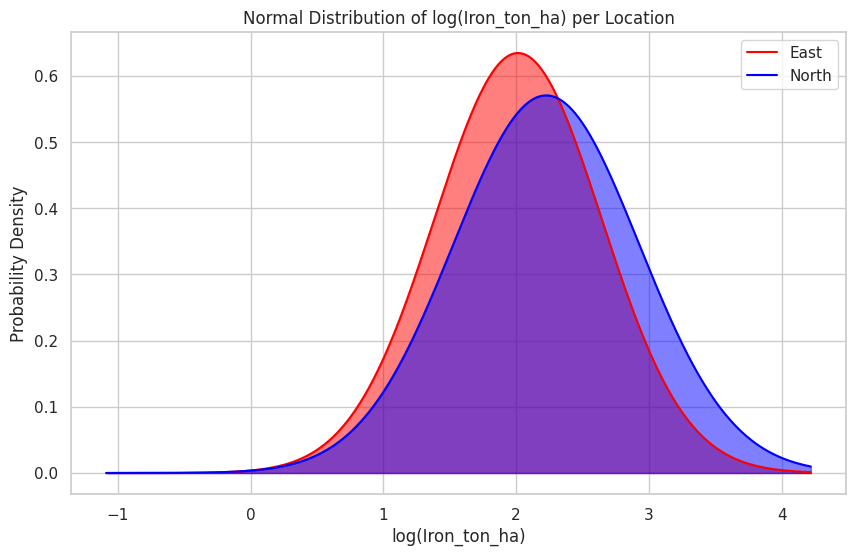

In [9]:
# Taking the log of each Iron_ton_ha value
log_east_data = np.log(east_data)
log_north_data = np.log(north_data)

# Calculate the mean and standard deviation for the log-transformed data
mean_log_east = log_east_data.mean()
std_log_east = log_east_data.std()
mean_log_north = log_north_data.mean()
std_log_north = log_north_data.std()

# Generate points on the x axis based on the log-transformed data range
log_points = np.linspace(min(log_east_data.min(), log_north_data.min()), max(log_east_data.max(), log_north_data.max()), 1000)

# Calculate the PDFs for the log-transformed data
pdf_log_east = norm.pdf(log_points, mean_log_east, std_log_east)
pdf_log_north = norm.pdf(log_points, mean_log_north, std_log_north)

# Plot the PDFs for the log-transformed data
plt.figure(figsize=(10, 6))
plt.plot(log_points, pdf_log_east, color="red", label="East")
plt.plot(log_points, pdf_log_north, color="blue", label="North")
plt.fill_between(log_points, pdf_log_east, color="red", alpha=0.5)
plt.fill_between(log_points, pdf_log_north, color="blue", alpha=0.5)

plt.title('Normal Distribution of log(Iron_ton_ha) per Location')
plt.xlabel('log(Iron_ton_ha)')
plt.ylabel('Probability Density')
plt.legend()

plt.show()


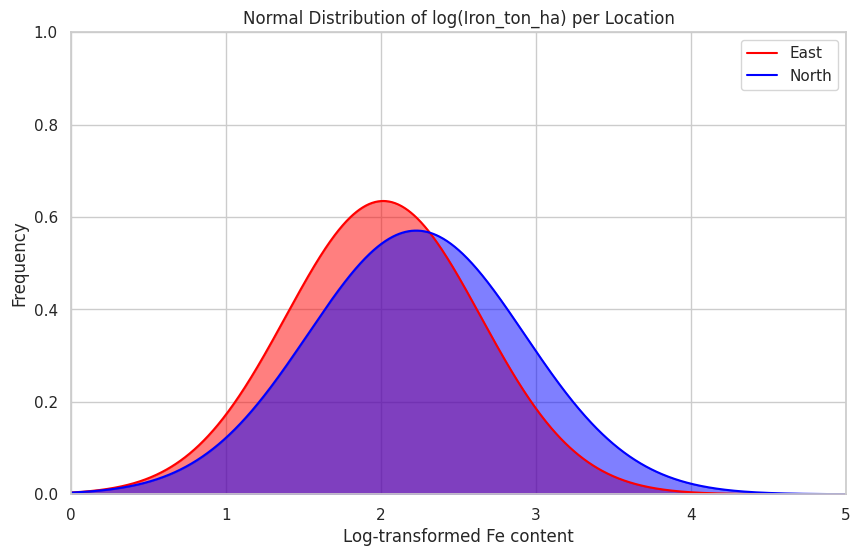

In [10]:
# Adjusting the plot to focus on the specified range and labeling
plt.figure(figsize=(10, 6))

# Because we're now focusing on a specific range for the axes, let's recalculate the PDFs within this new range
log_points_adjusted = np.linspace(0, 5, 1000)
pdf_log_east_adjusted = norm.pdf(log_points_adjusted, mean_log_east, std_log_east)
pdf_log_north_adjusted = norm.pdf(log_points_adjusted, mean_log_north, std_log_north)

plt.plot(log_points_adjusted, pdf_log_east_adjusted, color="red", label="East")
plt.plot(log_points_adjusted, pdf_log_north_adjusted, color="blue", label="North")
plt.fill_between(log_points_adjusted, pdf_log_east_adjusted, color="red", alpha=0.5)
plt.fill_between(log_points_adjusted, pdf_log_north_adjusted, color="blue", alpha=0.5)

plt.xlim(0, 5)
plt.ylim(0, 1)
plt.xlabel('Log-transformed Fe content')
plt.ylabel('Frequency')
plt.title('Normal Distribution of log(Iron_ton_ha) per Location')
plt.legend()

plt.show()


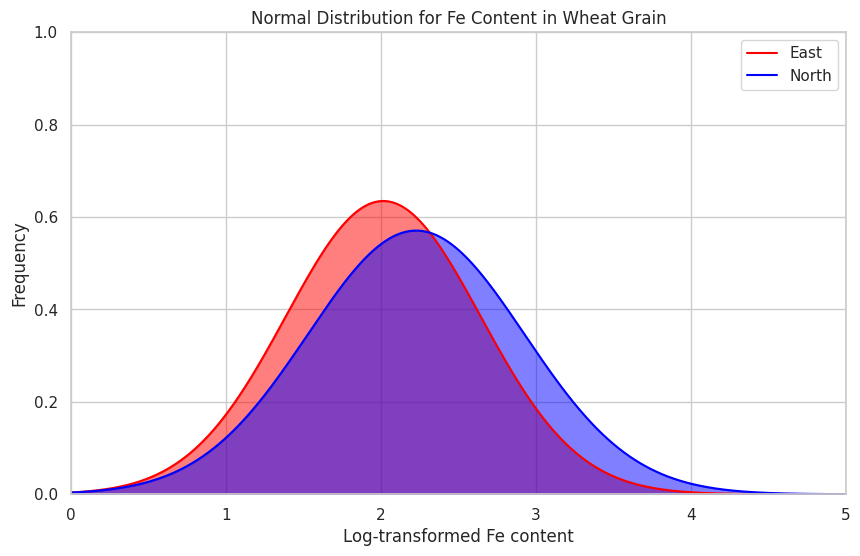

In [11]:
# Updating the graph with the new title
plt.figure(figsize=(10, 6))

plt.plot(log_points_adjusted, pdf_log_east_adjusted, color="red", label="East")
plt.plot(log_points_adjusted, pdf_log_north_adjusted, color="blue", label="North")
plt.fill_between(log_points_adjusted, pdf_log_east_adjusted, color="red", alpha=0.5)
plt.fill_between(log_points_adjusted, pdf_log_north_adjusted, color="blue", alpha=0.5)

plt.xlim(0, 5)
plt.ylim(0, 1)
plt.xlabel('Log-transformed Fe content')
plt.ylabel('Frequency')
plt.title('Normal Distribution for Fe Content in Wheat Grain')
plt.legend()

plt.show()


## Summary

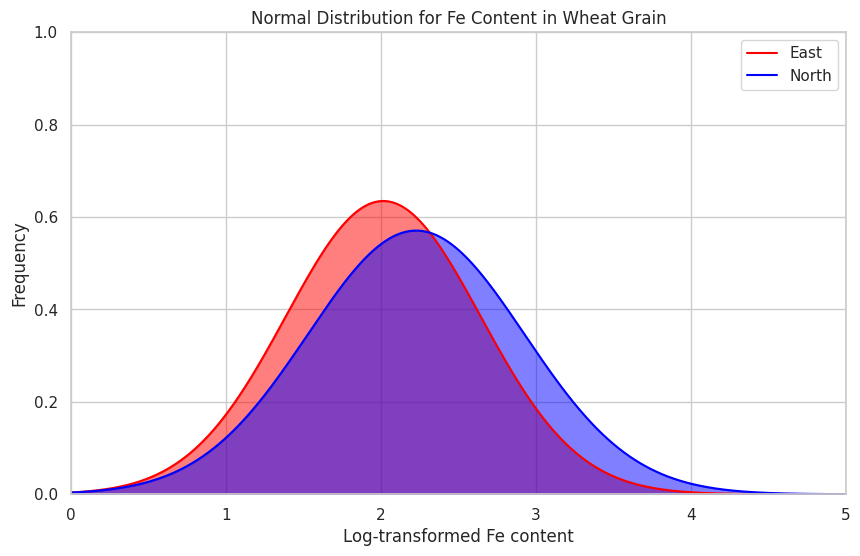

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Filter data for each location
east_data = dataA[dataA['Location'] == 'East']['Iron_ton_ha']
north_data = dataA[dataA['Location'] == 'North']['Iron_ton_ha']

# Updating the graph with the new title
plt.figure(figsize=(10, 6))

plt.plot(log_points_adjusted, pdf_log_east_adjusted, color="red", label="East")
plt.plot(log_points_adjusted, pdf_log_north_adjusted, color="blue", label="North")
plt.fill_between(log_points_adjusted, pdf_log_east_adjusted, color="red", alpha=0.5)
plt.fill_between(log_points_adjusted, pdf_log_north_adjusted, color="blue", alpha=0.5)

plt.xlim(0, 5)
plt.ylim(0, 1)
plt.xlabel('Log-transformed Fe content')
plt.ylabel('Frequency')
plt.title('Normal Distribution for Fe Content in Wheat Grain')
plt.legend()

plt.show()